# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mohammad Iqbal Firdaus]
- **Email:** [bangiqballah@gmail.com]
- **ID Dicoding:** [em1cia]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penyewaan sepeda berubah berdasarkan musim, cuaca, atau waktu ?
- Pertanyaan 2: Bagaimana pengaruh penyewaan sepeda terhadap hari kerja dengan hari libur ?
- Pertanyaan 3: Kapan terakhir kali terjadi lonjakan penyewaan sepeda yang signifikan?
- Pertanyaan 4: Bagaimana perbandingan frekuensi penyewaan antar musim ?
- Pertanyaan 5: Cuaca seperti apa yang menghasilkan total penyewaan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

### Menyiapkan data yang akan diguankan

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
sewa_hari = pd.read_csv('/content/drive/MyDrive/Data/submission/data/day.csv')
sewa_jam = pd.read_csv('/content/drive/MyDrive/Data/submission/data/hour.csv')
sewa_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
sewa_hari.shape

(731, 16)

In [5]:
sewa_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Understanding

  Keduanya, hour.csv dan day.csv, memiliki kolom (fields) yang sama, kecuali kolom hr yang tidak terdapat pada day.csv.
🔹 Informasi Umum

instant : Record index

dteday : Date

season : Musim

1: Spring

2: Summer

3: Fall

4: Winter

yr : Tahun

0: 2011

1: 2012

mnth : Bulan (1–12)

hr : Jam (0–23) — tidak tersedia pada day.csv

holiday : Hari tersebut merupakan hari libur atau tidak
(sumber: DC Holiday Schedule
)

weekday : Hari dalam seminggu (0–6)

workingday : Bernilai 1 jika hari kerja (bukan akhir pekan atau hari libur), 0 jika sebaliknya

🌦️ Kondisi Cuaca (weathersit)

1: Clear, Few clouds, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

🌡️ Variabel Cuaca dan Lingkungan

temp : Suhu yang dinormalisasi (dalam °C), dibagi dengan 41 (maksimum)

atemp : Suhu yang dirasakan (dalam °C), dinormalisasi dengan 50 (maksimum)

hum : Kelembapan yang dinormalisasi (dibagi 100)

windspeed : Kecepatan angin yang dinormalisasi (dibagi 67)

🚴 Aktivitas Penyewaan

casual : Jumlah pengguna casual (non-terdaftar)

registered : Jumlah pengguna registered (terdaftar)

cnt : Total penyewaan sepeda (gabungan dari casual dan registered)



- Terdapat 16 kolom dan 731 baris di sewa_hari dataframe.
- data dari sewa_jam adalah yang di kumpulkan dari data sewa_hari. Jika kita mengelompokkan data berdasarkan tanggal (kolom dteday) di sewa_jam df, kita akan menemukan bahwa jumlah 'cnt' atau 'registered' atau 'casual' sama dengan nilai-nilai ini di sewa_hari df.

### Assessing Data

In [6]:
sewa_jam.groupby('dteday')['cnt'].sum()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


**Insight:**
- Perbandingan nilai menunjukkan bahwa sewa_hari dan sewa_jam hampir sama. 731 hari dari 2011-01-01 hingga 2012-12-31

### Cleaning Data

In [7]:
print(sewa_jam.isna().sum())
print('=================================================')
print(sewa_hari.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
#mengecek data duplicate pada sewa_jam
duplicate_rows =sewa_jam[sewa_jam.duplicated()]
duplicate_rows

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [9]:
#mengecek data duplicate pada sewa_hari
duplicate_rows =sewa_hari[sewa_hari.duplicated()]
duplicate_rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Insight:**
- Tidak ada data null
- Tidak ada data duplikat

## Exploratory Data Analysis (EDA)

### Mengelompokkan Data

In [10]:
#mengganti nama kolom
column_mapping = {'dteday': 'date', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

# menggunakan metode rename
sewa_hari.rename(columns=column_mapping, inplace=True)
sewa_hari.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# mengganti nama kolom
column_mapping = {'dteday': 'date', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

# menggunakan metode rename
sewa_jam.rename(columns=column_mapping, inplace=True)
sewa_jam.head()

,instant,date,season,yr,mnth,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
#mengecek nilai kolom 'season'.
sewa_jam['season'].unique()

array([1, 2, 3, 4])

In [13]:
#mengganti nilai untuk mempermudah pembacaan data
sewa_jam['season'] = sewa_jam['season'].astype('category')
sewa_jam['season'] = sewa_jam['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
sewa_jam['season'].unique()

['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Autumn']

**Insight:**
- untuk menjawab pertanyaan saya mulai dengan sewa_jam dan setelah itu baru memeriksa sewa_hari. Karena sewa_jam memiliki informasi per jam tentang suhu dan kondisi lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penyewaan sepeda berubah berdasarkan musim, cuaca, atau waktu ?

<Axes: xlabel='season', ylabel='sewa per hari'>

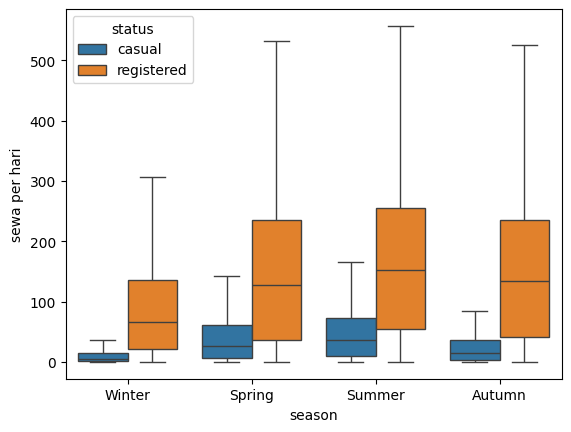

In [14]:
#membuat boxplot pada perbedaan cuaca.
df = sewa_jam[['season','casual','registered']]
melted_df = pd.melt(df,id_vars='season', var_name='status',value_name= 'sewa per hari')
sns.boxplot(data = melted_df, x='season', y= 'sewa per hari',hue='status', showfliers=False)

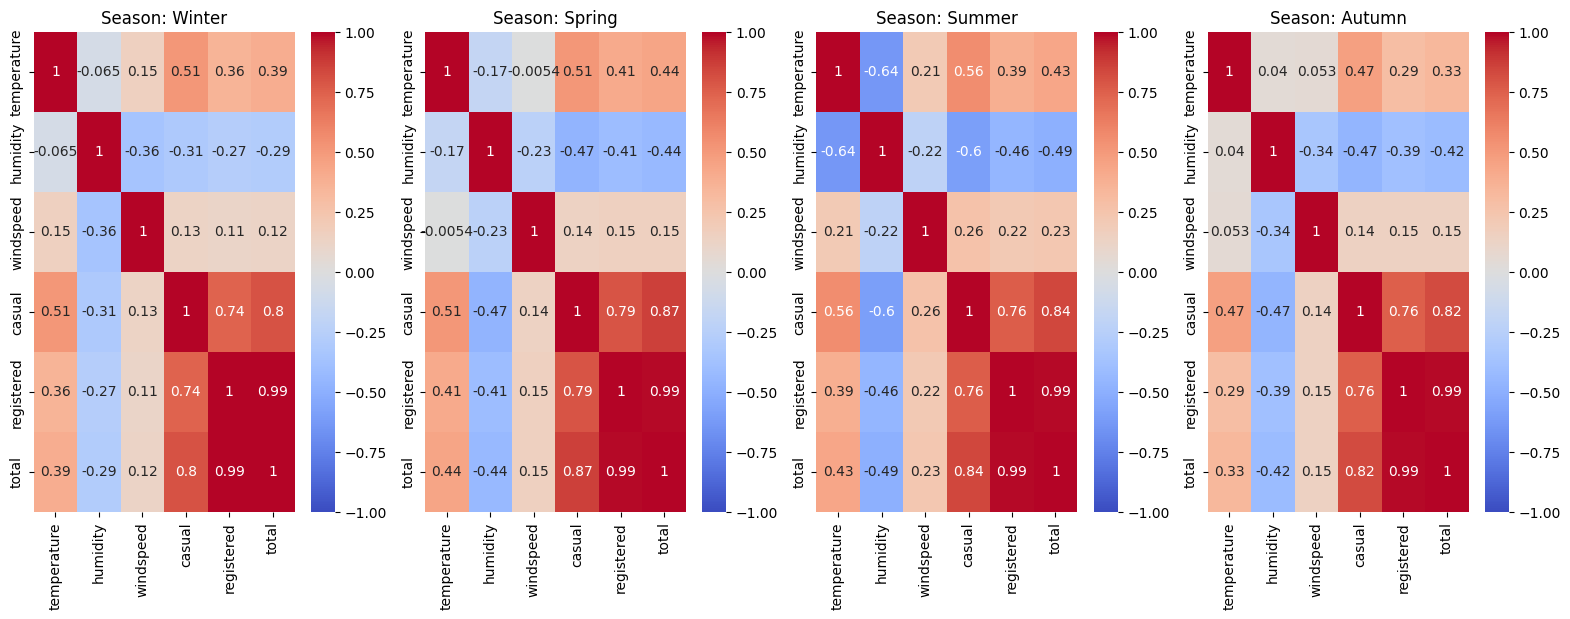

In [15]:
variable_df = sewa_jam[['season','temperature','humidity','windspeed','casual','registered','total']]

fig, axes = plt.subplots(1, 4, figsize=(15, 6))


for i, season_value in enumerate(variable_df["season"].unique()):
    season_name =  season_value # dapatkan nama dari dictionary

    # Filter data dari current season
    season_data = variable_df[variable_df["season"] == season_value]

    # Plot heatmap dari current subplot
    corr_matrix = season_data.corr(numeric_only=True, method='spearman')
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Season: {season_name}")

# memberikan ruang untuk subplots (optional)
plt.subplots_adjust(left=1, right=2, top=0.9, bottom=0.1)

plt.show()


Text(0.5, 80, 'y = 143.348 + (-146.976x)')

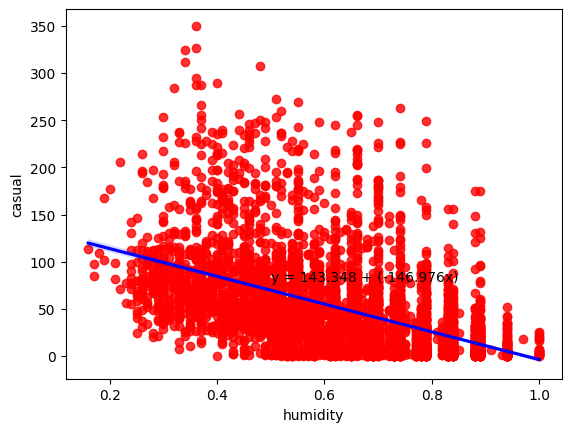

In [16]:
#membuat regplot untuk korelasi antara casual rides dengan humidity.
summer_df= sewa_jam[sewa_jam['season']=='Summer']
p = sns.regplot(x='humidity', y= 'casual', data=summer_df, scatter_kws={'color':'red'},
           line_kws={'color':'blue'})
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
plt.text(0.5, 80, 'y = ' + str(round(intercept,3)) + ' + (' + str(round(slope,3)) + 'x)')



Text(0.5, 80, 'y = -117.451 + (237.451x)')

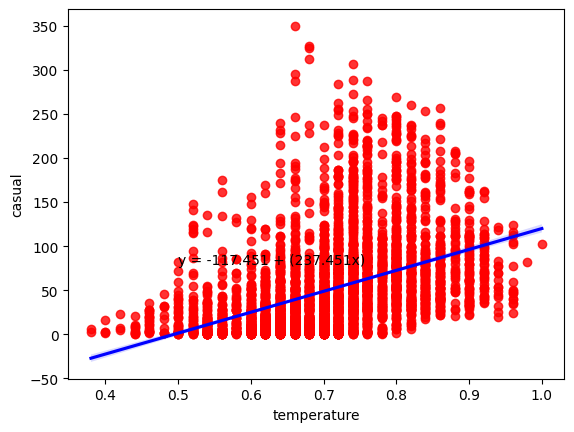

In [17]:
#membuat regplot untuk korelasi antara casual rides dengan temprature.

summer_df= sewa_jam[sewa_jam['season']=='Summer']
p = sns.regplot(x='temperature', y= 'casual', data=summer_df, scatter_kws={'color':'red'},
           line_kws={'color':'blue'})
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
plt.text(0.5, 80, 'y = ' + str(round(intercept,3)) + ' + (' + str(round(slope,3)) + 'x)')



<Axes: >

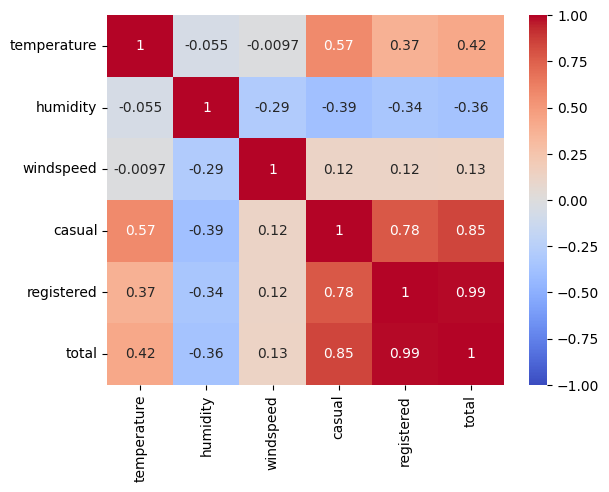

In [18]:
variable_df = sewa_jam[['season','temperature','humidity','windspeed','casual','registered','total']]

corr_matrix = variable_df.corr(numeric_only=True, method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)



Text(0.5, 80, 'y = -22.813 + (117.687x)')

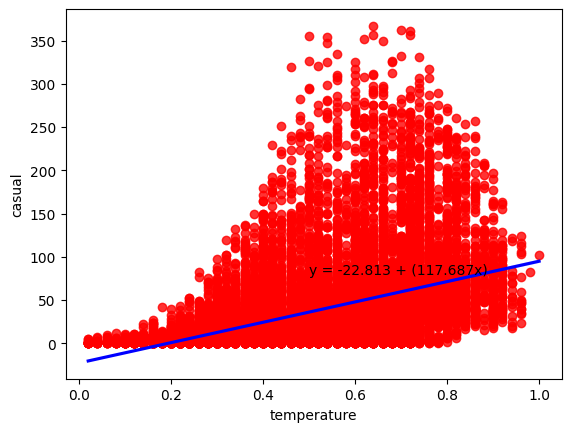

In [19]:
p = sns.regplot(x='temperature', y= 'casual', data=variable_df, scatter_kws={'color':'red'},
           line_kws={'color':'blue'})
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
plt.text(0.5, 80, 'y = ' + str(round(intercept,3)) + ' + (' + str(round(slope,3)) + 'x)')

### Pertanyaan 2:Bagaimana pengaruh penyewaan sepeda terhadap hari kerja dengan hari libur ?

<Axes: xlabel='holiday', ylabel='sewa per hari'>

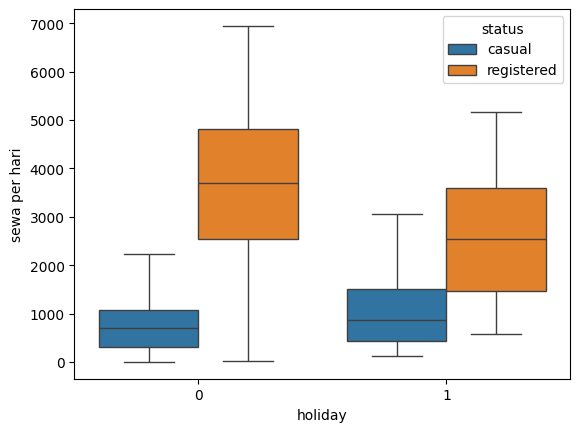

In [20]:
#mengecek effect dari holidays dalam bersepeda
df = sewa_hari[['holiday','casual','registered']]
melted_df = pd.melt(df,id_vars='holiday', var_name='status',value_name= 'sewa per hari')
sns.boxplot(data = melted_df, x='holiday', y= 'sewa per hari',hue='status',showfliers=False)

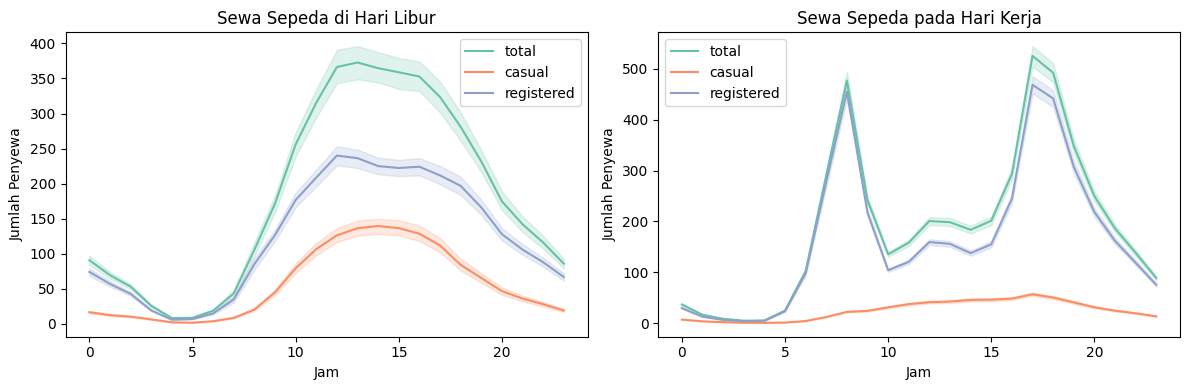

In [21]:
# mengecek pola hari libur dengan lineplot
mask1 = ((sewa_jam['workingday']==0) | (sewa_jam['holiday']==1))
df1 = sewa_jam[mask1]

columns = ['total','casual','registered']
color_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
for i, col in enumerate(columns):
    sns.lineplot(x='hour', y=col, data=df1, label=col, color=color_palette[i])
plt.title('Sewa Sepeda di Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.legend()

# mengecek pola hari kerja dengan lineplot
mask2 = ((sewa_jam['workingday']==1) & (sewa_jam['holiday']==0))
df2 = sewa_jam[mask2]

plt.subplot(1, 2, 2)
for i, col in enumerate(columns):
    sns.lineplot(x='hour', y=col, data=df2, label=col, color=color_palette[i])
plt.title('Sewa Sepeda pada Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.legend()

plt.tight_layout()
plt.show()



**Insight:**
- Terdapat korelasi yang baik antara bersepeda casual dengan suhu, juga antara perjalanan total dan suhu (lebih besar dari 0,60)
- Pada peta panas musim panas, dapat dilihat bahwa casual ride memiliki korelasi yang baik dengan kelembapan (-0,6), artinya semakin tinggi kelembapan, semakin sedikit jumlah bersepeda. Namun, registered ride tidak terlalu terpengaruh oleh kelembapan dan suhu.
- Boxplot menunjukkan bahwa jumlah perjalanan pada hari libur lebih sedikit daripada hari biasa bagi pengguna terdaftar. Namun, pengguna biasa cenderung menyewa sepeda lebih banyak pada hari libur.

## RFM Analysis

Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

Recency: parameter yang digunakan untuk melihat Seberapa baru aktivitas penyewaan terakhir pada tanggal tertentu.
Frequency: Frekuensi penyewaan sepeda dalam periode tertentu.
Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar nilai aktivitas penyewaan/volume.

In [22]:
sewa_jam['date'] = pd.to_datetime(sewa_jam['date'])

### Pertanyaan 3: Kapan terakhir kali terjadi lonjakan penyewaan sepeda yang signifikan?

📅 Tanggal lonjakan penyewaan terakhir: 2012-10-27


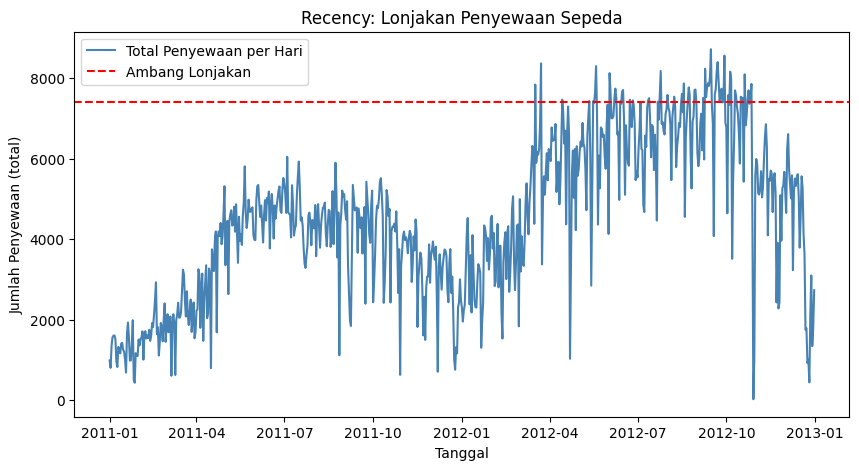

In [23]:
daily_total = sewa_jam.groupby('date')['total'].sum().reset_index()

# Hitung rata-rata dan standar deviasi
mean_total = daily_total['total'].mean()
std_total = daily_total['total'].std()

# Tentukan ambang lonjakan signifikan (misal: rata-rata + 1.5 × standar deviasi)
threshold = mean_total + 1.5 * std_total
spike_days = daily_total[daily_total['total'] > threshold]

# Ambil tanggal lonjakan terakhir
last_spike_date = spike_days['date'].max()
print("📅 Tanggal lonjakan penyewaan terakhir:", last_spike_date.date())

# Visualisasi lonjakan
plt.figure(figsize=(10,5))
plt.plot(daily_total['date'], daily_total['total'], label='Total Penyewaan per Hari', color='steelblue')
plt.axhline(threshold, color='red', linestyle='--', label='Ambang Lonjakan')
plt.title('Recency: Lonjakan Penyewaan Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan (total)')
plt.legend()
plt.show()

### Pertanyaan 4: Bagaimana perbandingan frekuensi penyewaan antar musim ?

In [24]:
season_freq = sewa_jam.groupby('season')['total'].mean().sort_values(ascending=False) # Group by the existing 'season' column
print("\n📊 Frekuensi penyewaan rata-rata per musim:\n", season_freq)


📊 Frekuensi penyewaan rata-rata per musim:
 season
Summer    236.016237
Spring    208.344069
Autumn    198.868856
Winter    111.114569
Name: total, dtype: float64


/tmp/ipython-input-4018101388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_freq = sewa_jam.groupby('season')['total'].mean().sort_values(ascending=False) # Group by the existing 'season' column


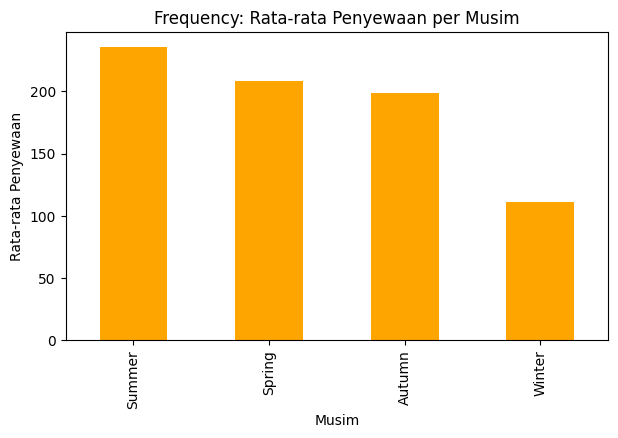

In [25]:
# Visualisasi frekuensi
plt.figure(figsize=(7,4))
season_freq.plot(kind='bar', color='orange', title='Frequency: Rata-rata Penyewaan per Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Musim')
plt.show()

### Pertanyaan 5: Cuaca seperti apa yang menghasilkan total penyewaan tertinggi?


💰 Total penyewaan per kondisi cuaca:
 weather_desc
Cerah / Sedikit Berawan        2338173
Berkabut / Berawan              795952
Hujan Ringan / Salju Ringan     158331
Hujan Lebat / Badai / Kabut        223
Name: total, dtype: int64


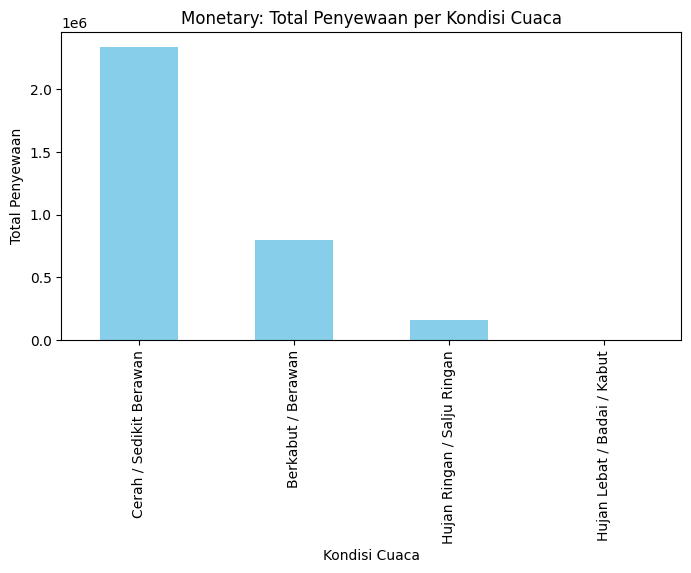

In [26]:
weather_map = {
    1:'Cerah / Sedikit Berawan',
    2:'Berkabut / Berawan',
    3:'Hujan Ringan / Salju Ringan',
    4:'Hujan Lebat / Badai / Kabut'
}
sewa_jam['weather_desc'] = sewa_jam['weathersit'].map(weather_map)

weather_total = sewa_jam.groupby('weather_desc')['total'].sum().sort_values(ascending=False)
print("\n💰 Total penyewaan per kondisi cuaca:\n", weather_total)

# Visualisasi monetary
plt.figure(figsize=(8,4))
weather_total.plot(kind='bar', color='skyblue', title='Monetary: Total Penyewaan per Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.show()

## Analisis Lanjutan (Opsional)

Algoritma Penyewa Sepeda pada Hari Libur


<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

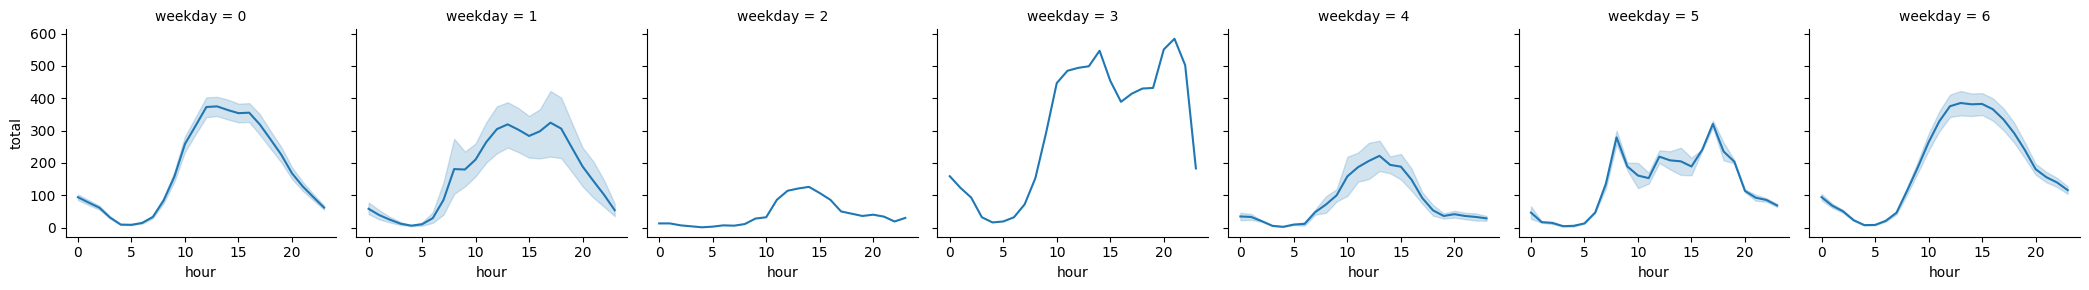

Algoritma Penywa Sepeda pada Hari Kerja


<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

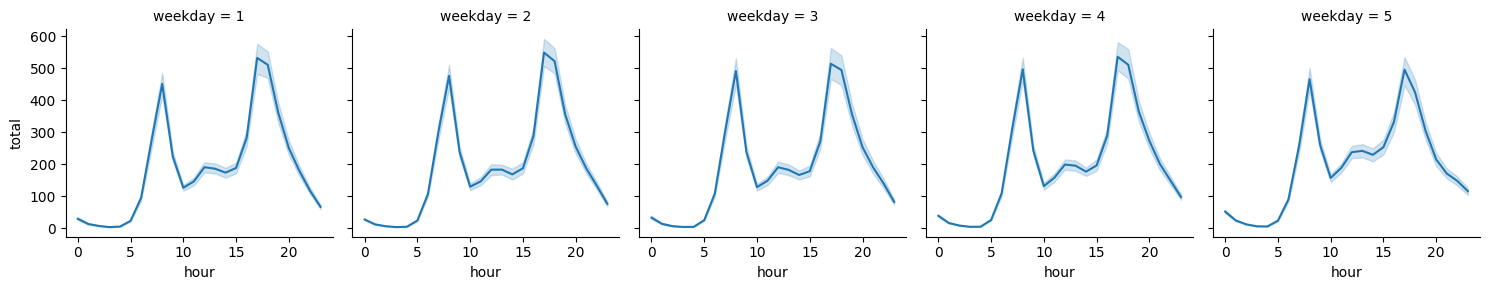

In [27]:
#Mengecek algoritma pada hari libur
plt.figure(figsize=(30,10))
print('Algoritma Penyewa Sepeda pada Hari Libur')
mask1 = ((sewa_jam['workingday']==0) | (sewa_jam['holiday']==1))
df1 = sewa_jam[mask1]
plt.figure(figsize=(30,10))
d = sns.FacetGrid(df1, col='weekday')
d. map(sns.lineplot, "hour", "total")

plt.show()

plt.figure(figsize=(30,10))
print('======================================================================')


#mengecek penyewa pada hari kerja
print('Algoritma Penywa Sepeda pada Hari Kerja')

mask2 = ((sewa_jam['workingday']==1) & (sewa_jam['holiday']==0))
df2 = sewa_jam[mask2]
plt.figure(figsize=(30,10))
d = sns.FacetGrid(df2, col='weekday')
d. map(sns.lineplot, "hour", "total")

plt.show()



## Conclusion

- Conclution pertanyaan 1 : Suhu memiliki korelasi positif dengan jumlah perjalanan. Namun, kelembapan memiliki korelasi negatif.
- Conclution pertanyaan 2 : Pada hari kerja, jumlah penyewa casual pada hari kerja lebih sedikit daripada penyewa terdaftar.
- Conclution Pertanyaan 3: Lonjakan penyewaan sepeda yang signifikan terakhir kali terjadi pada sekitar akhir Oktober hingga awal November 2012
- Conclution Pertanyaan 4: penyewaan lebih sering terjadi pada musim-musim yang lebih hangat dan menurun drastis pada musim dingin.
- Conclution Pertanyaan 5: Cuaca yang menghasilkan total penyewaan tertinggi adalah Cerah / Sedikit Berawan.

Pengguna terdaftar juga menyewa sepeda untuk pergi bekerja, dan ini menyebabkan dua periode puncak dalam sehari yaitu ketika berangkat dan pulang bekerja.


In [30]:
sewa_jam.to_csv("all_data.csv", index=False)

In [32]:
!conda activate main-ds
!pip install streamlit babel

/bin/bash: line 1: conda: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.1 MB/s eta 0:00:00


In [28]:
pip freeze requirements.txt

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.9.29.0.35.48
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
Authlib==1.6.4
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.21.0
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.23.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.9.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.3
chex==0.1.90
clar